### Create the data

In [20]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [21]:
from res.plot_lib import plot_data, plot_model, set_default

In [22]:
set_default()

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [24]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [25]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


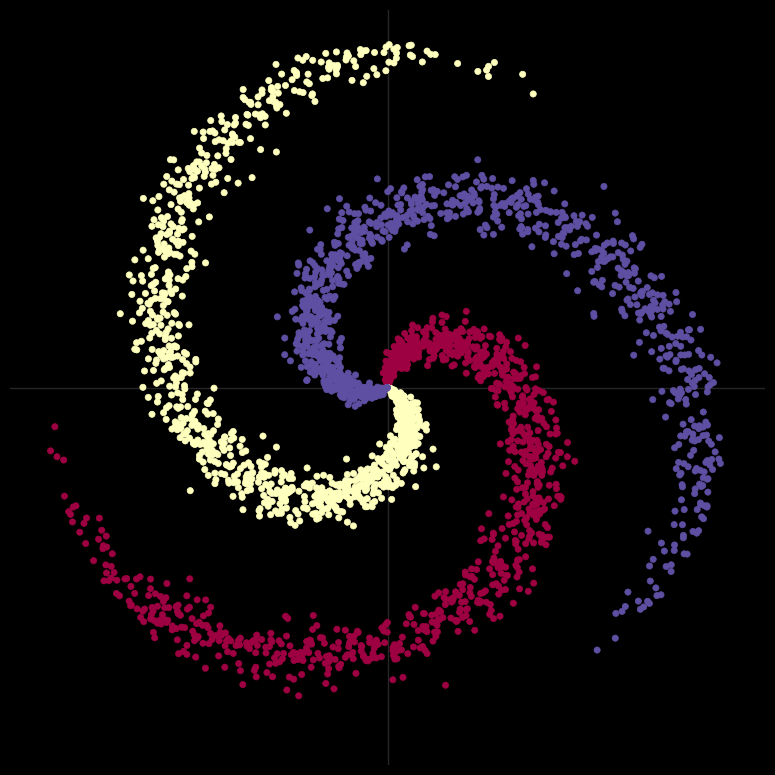

In [26]:
# visualise the data
plot_data(X, y)

### Linear model

In [27]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [30]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
model.to(device) #Convert to CUDA

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training
for t in range(1000):
    
    # Feed forward to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    #display.clear_output(wait=True)
    
    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 0, [LOSS]: 1.044278, [ACCURACY]: 0.595
[EPOCH]: 1, [LOSS]: 1.043884, [ACCURACY]: 0.596
[EPOCH]: 2, [LOSS]: 1.043490, [ACCURACY]: 0.597
[EPOCH]: 3, [LOSS]: 1.043097, [ACCURACY]: 0.598
[EPOCH]: 4, [LOSS]: 1.042705, [ACCURACY]: 0.599
[EPOCH]: 5, [LOSS]: 1.042314, [ACCURACY]: 0.600
[EPOCH]: 6, [LOSS]: 1.041924, [ACCURACY]: 0.600
[EPOCH]: 7, [LOSS]: 1.041533, [ACCURACY]: 0.602
[EPOCH]: 8, [LOSS]: 1.041144, [ACCURACY]: 0.602
[EPOCH]: 9, [LOSS]: 1.040756, [ACCURACY]: 0.603
[EPOCH]: 10, [LOSS]: 1.040368, [ACCURACY]: 0.601
[EPOCH]: 11, [LOSS]: 1.039981, [ACCURACY]: 0.600
[EPOCH]: 12, [LOSS]: 1.039595, [ACCURACY]: 0.600
[EPOCH]: 13, [LOSS]: 1.039210, [ACCURACY]: 0.601
[EPOCH]: 14, [LOSS]: 1.038825, [ACCURACY]: 0.601
[EPOCH]: 15, [LOSS]: 1.038441, [ACCURACY]: 0.600
[EPOCH]: 16, [LOSS]: 1.038058, [ACCURACY]: 0.600
[EPOCH]: 17, [LOSS]: 1.037675, [ACCURACY]: 0.599
[EPOCH]: 18, [LOSS]: 1.037294, [ACCURACY]: 0.599
[EPOCH]: 19, [LOSS]: 1.036913, [ACCURACY]: 0.598
[EPOCH]: 20, [LOSS]: 1.036532,

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


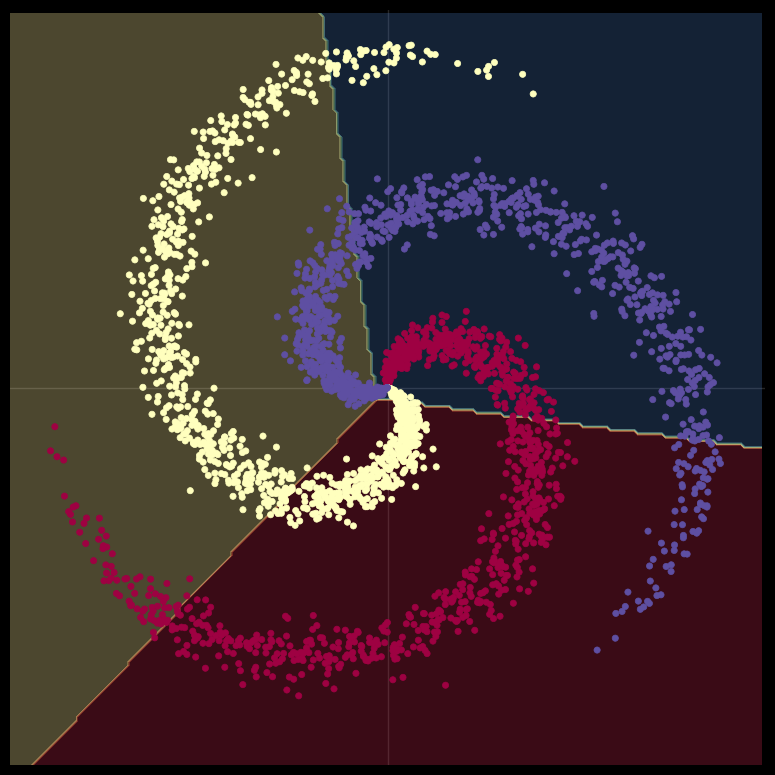

In [31]:
# Plot trained model
print(model)
plot_model(X, y, model)

### Two-layered network

In [32]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [33]:
# nn package to create our linear model
# each Linear module has a weight and bias

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# ADAM for our parameter updates
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# e = 1.  # plotting purpose

# Training
for t in range(1000):
    
    # Feed forward to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    #display.clear_output(wait=True)
    
    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 0, [LOSS]: 1.100545, [ACCURACY]: 0.342
[EPOCH]: 1, [LOSS]: 1.093987, [ACCURACY]: 0.344
[EPOCH]: 2, [LOSS]: 1.087577, [ACCURACY]: 0.346
[EPOCH]: 3, [LOSS]: 1.081307, [ACCURACY]: 0.368
[EPOCH]: 4, [LOSS]: 1.075172, [ACCURACY]: 0.381
[EPOCH]: 5, [LOSS]: 1.069159, [ACCURACY]: 0.389
[EPOCH]: 6, [LOSS]: 1.063259, [ACCURACY]: 0.478
[EPOCH]: 7, [LOSS]: 1.057464, [ACCURACY]: 0.480
[EPOCH]: 8, [LOSS]: 1.051768, [ACCURACY]: 0.476
[EPOCH]: 9, [LOSS]: 1.046166, [ACCURACY]: 0.544
[EPOCH]: 10, [LOSS]: 1.040652, [ACCURACY]: 0.518
[EPOCH]: 11, [LOSS]: 1.035224, [ACCURACY]: 0.503
[EPOCH]: 12, [LOSS]: 1.029878, [ACCURACY]: 0.505
[EPOCH]: 13, [LOSS]: 1.024609, [ACCURACY]: 0.497
[EPOCH]: 14, [LOSS]: 1.019416, [ACCURACY]: 0.500
[EPOCH]: 15, [LOSS]: 1.014294, [ACCURACY]: 0.504
[EPOCH]: 16, [LOSS]: 1.009242, [ACCURACY]: 0.504
[EPOCH]: 17, [LOSS]: 1.004256, [ACCURACY]: 0.506
[EPOCH]: 18, [LOSS]: 0.999337, [ACCURACY]: 0.504
[EPOCH]: 19, [LOSS]: 0.994481, [ACCURACY]: 0.505
[EPOCH]: 20, [LOSS]: 0.989689,

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


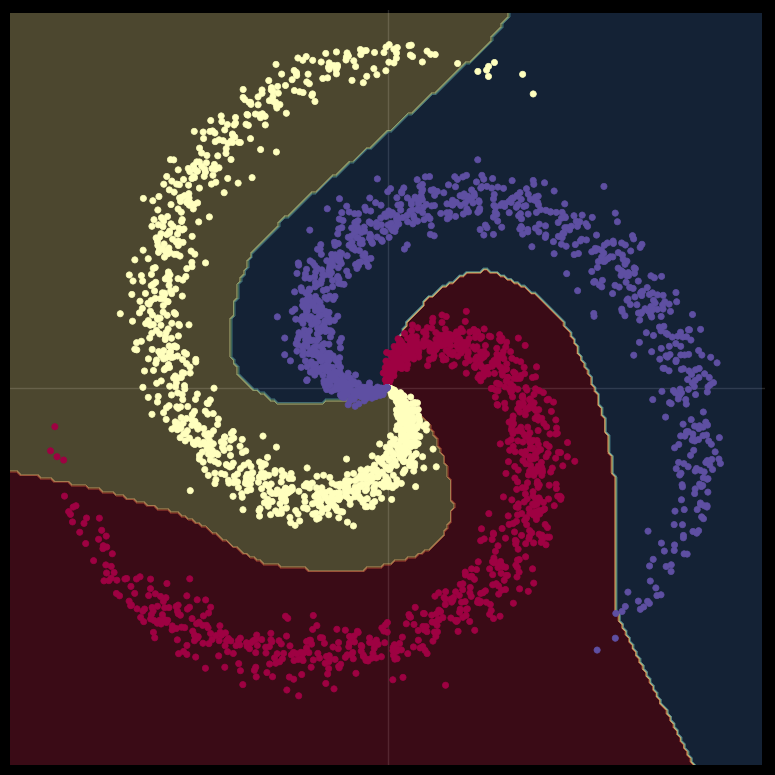

In [34]:
# Plot trained model
print(model)
plot_model(X, y, model)

In [37]:
# nn package to create our linear model
# each Linear module has a weight and bias

model = nn.Sequential(
    nn.Linear(D, 20),
    nn.ReLU(),
    nn.Linear(20, 20),
    nn.Tanh(),
    nn.Linear(20, 20),
    nn.SELU(),
    nn.Linear(20, C)
)
model.to(device)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# ADAM for our parameter updates
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# e = 1.  # plotting purpose

# Training
for t in range(1000):
    
    # Feed forward to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    #display.clear_output(wait=True)
    
    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 0, [LOSS]: 1.109601, [ACCURACY]: 0.362
[EPOCH]: 1, [LOSS]: 1.106692, [ACCURACY]: 0.374
[EPOCH]: 2, [LOSS]: 1.103858, [ACCURACY]: 0.386
[EPOCH]: 3, [LOSS]: 1.101093, [ACCURACY]: 0.395
[EPOCH]: 4, [LOSS]: 1.098393, [ACCURACY]: 0.405
[EPOCH]: 5, [LOSS]: 1.095752, [ACCURACY]: 0.417
[EPOCH]: 6, [LOSS]: 1.093166, [ACCURACY]: 0.425
[EPOCH]: 7, [LOSS]: 1.090641, [ACCURACY]: 0.431
[EPOCH]: 8, [LOSS]: 1.088148, [ACCURACY]: 0.439
[EPOCH]: 9, [LOSS]: 1.085681, [ACCURACY]: 0.446
[EPOCH]: 10, [LOSS]: 1.083228, [ACCURACY]: 0.445
[EPOCH]: 11, [LOSS]: 1.080782, [ACCURACY]: 0.438
[EPOCH]: 12, [LOSS]: 1.078341, [ACCURACY]: 0.425
[EPOCH]: 13, [LOSS]: 1.075910, [ACCURACY]: 0.409
[EPOCH]: 14, [LOSS]: 1.073483, [ACCURACY]: 0.402
[EPOCH]: 15, [LOSS]: 1.071037, [ACCURACY]: 0.395
[EPOCH]: 16, [LOSS]: 1.068554, [ACCURACY]: 0.391
[EPOCH]: 17, [LOSS]: 1.066051, [ACCURACY]: 0.389
[EPOCH]: 18, [LOSS]: 1.063539, [ACCURACY]: 0.394
[EPOCH]: 19, [LOSS]: 1.061029, [ACCURACY]: 0.398
[EPOCH]: 20, [LOSS]: 1.058510,

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Tanh()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): SELU()
  (6): Linear(in_features=20, out_features=3, bias=True)
)


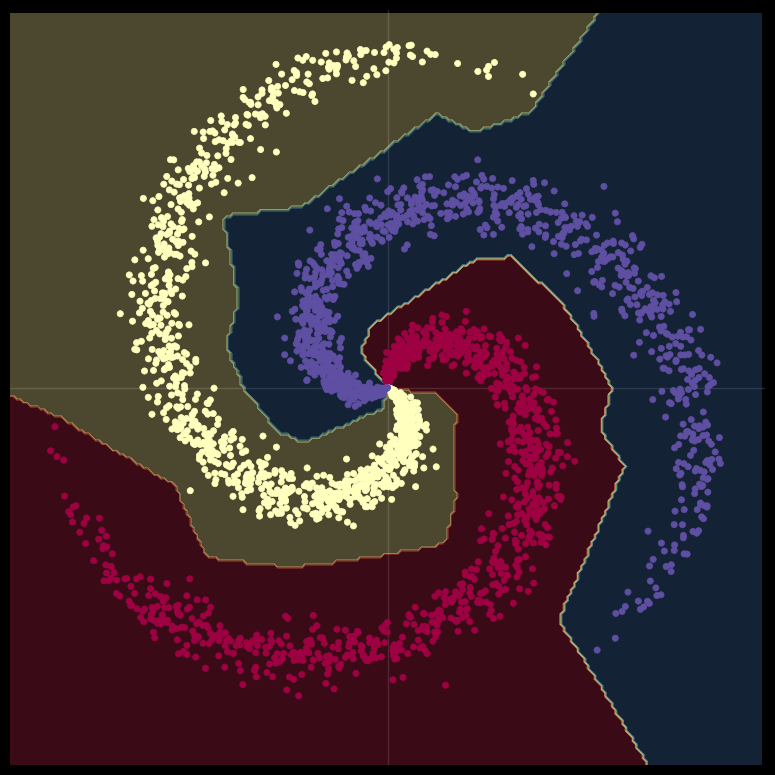

In [38]:
# Plot trained model
print(model)
plot_model(X, y, model)

In [41]:
y_pred.shape

torch.Size([3000, 3])

In [42]:
torch.max(y_pred, 1)

torch.return_types.max(
values=tensor([0.2969, 0.2363, 0.2644,  ..., 9.1875, 9.0436, 8.4931],
       grad_fn=<MaxBackward0>),
indices=tensor([1, 1, 2,  ..., 2, 2, 2]))